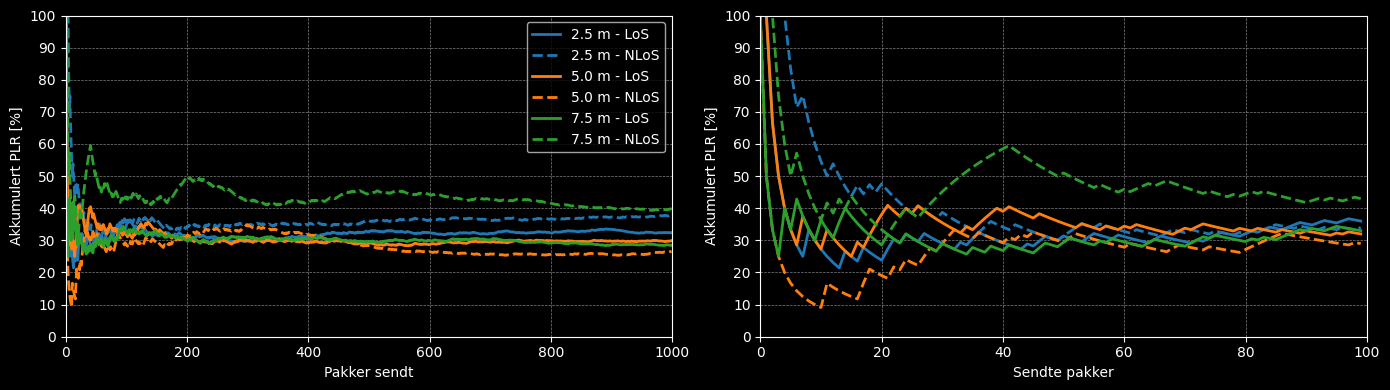

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Dataset keys og filstier
keys = ["2_5m_LoS", "2_5m_NLoS", "5_0m_LoS", "5_0m_NLoS", "7_5m_LoS", "7_5m_NLoS"]
file_paths = [f"PakkeData/{key}.txt" for key in keys]

# Les inn data
data = {}
keys = ["2.5 m - LoS", "2.5 m - NLoS", "5.0 m - LoS", "5.0 m - NLoS", "7.5 m - LoS", "7.5 m - NLoS"]
for key in keys:
    data[key] = []

for file_path, key in zip(file_paths, keys):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("DataNr"):
                nr = int(line.split("DataNr")[1])
                data[key].append(nr)

# Konverter til numpy arrays
for key in data:
    data[key] = np.array(data[key])

# Lager en array med alle indekser
idx = np.arange(0, 1000, 1)

# Plot the accumulated packet loss rat e
colors = ["tab:blue", "tab:blue", "tab:orange", "tab:orange", "tab:green", "tab:green"]
linestyles = ["-", "--", "-", "--", "-", "--", "-","--"]
zoom=100
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

for i, key in enumerate(keys):
    received = np.zeros_like(idx)
    received[data[key]] = 1  # Merk mottatte pakker med 1
    loss_rate = (1 - np.cumsum(received) / (idx + 1))*100  # Akkumulert tap rate
    axs[0].plot(idx, loss_rate, color=colors[i], label=f"{key}",linestyle=linestyles[i],linewidth=2)
    axs[1].plot(idx[:zoom], loss_rate[:zoom], color=colors[i],linestyle=linestyles[i],linewidth=2)

axs[0].set_xlabel("Pakker sendt")
axs[0].set_ylabel("Akkumulert PLR [%]")
axs[0].legend()
axs[0].grid(True, linestyle='--', color='gray',linewidth=0.5)
axs[0].set_yticks(np.arange(0, 101, 10))
axs[0].set_ylim(0, 100)
axs[0].set_xlim(0, 1000)

axs[1].set_xlabel("Sendte pakker")
axs[1].set_ylabel("Akkumulert PLR [%]")

axs[1].grid(True, linestyle='--', color='gray',linewidth=0.5)
axs[1].set_yticks(np.arange(0, 101, 10))
axs[1].set_ylim(0, 100)
axs[1].set_xlim(0, zoom)
plt.tight_layout()
plt.savefig("Figurer/PLR.pdf", bbox_inches='tight')
plt.show()
